# Анализ музыкальных предпочтений в Москве и Петербурге 

Сравнение музыкальных предпочтений Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки необходимо сравнить поведение пользователей двух столиц.

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования** — данные о поведении пользователей получим из файла `yandex_music_project.csv`. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится обзор данных, а также при необходимости, предобработка.  

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в четыре этапа:
1. Обзор данных.
2. Предобработка данных.
3. Проверка гипотез.
4. Итоги исследования.

## 1. Обзор данных
Составляем первое представление о данных Яндекс.Музыки

In [1]:
# Импорт библиотек
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Чтение файла с данными и сохранение их в переменную df 
df = pd.read_csv('yandex_music_project.csv')

In [3]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [4]:
# Получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Названия столбцов записаны не в "змеином регистре", например, колонку с ID нужно было назвать user_id



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Вывод по 1-ому разделу**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2. Предобработка данных
В данном разделе будут устранены самые критичные ошибки в данных

### 2.1. Работа со стилем заголовков

In [5]:
# Перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведём названия к хорошему стилю:
* Несколько слов в названии запишим в «змеином_регистре»,
* Все символы сделаем строчными,
* Устраним пробелы.

Для этого переименуем колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [6]:
# Переименование столбцов с помощью метода rename, так как он отработает без ошибок, даже если изменится порядок столбцов
df = df.rename(columns={'  userID':'user_id', 'Track':'track', '  City  ':'city', 'Day':'day'})

Проверим результат. Для этого ещё раз посмотрим на названия столбцов:

In [7]:
# Проверка применения метода rename
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### 2.2. Работа с пропусками значений

In [8]:
# Подсчёт пропусков в столбцах таблицы
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Выбран метод isna() для нахождения пропущенных значений, это отлично! На самом деле, isnull() и isna() делают одно и то же, но использование isna() предпочтительнее. </div>

Не все пропущенные значения влияют на исследование. Так, в `track` и `artist` пропуски не важны для данной работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. Было бы правильно установить причину пропусков и восстановить данные, но такой возможности нет, поэтому придётся:
1. Заполнить и эти пропуски явными обозначениями
2. Оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберём его элементы циклом и для каждого столбца выполним замену пропущенных значений

In [9]:
# Перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for columns in columns_to_replace:
    df[columns] = df[columns].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [10]:
# Подсчёт пропусков с целью проверки выполнения кода
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### 2.3. Работа с дубликатами

In [11]:
# Подсчёт явных дубликатов
df.duplicated().sum()

3826

In [12]:
# Удаление явных дубликатов (с внесением изменений в исходный датафрейм)
df.drop_duplicates(inplace=True)

In [13]:
# Проверка на отсутствие дубликатов
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Посмотрим список уникальных названий жанров, отсортированный в алфавитном порядке.

In [14]:
# Поиск неявных дубликатов
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Видим следующие неявные дубликаты названия `hiphop`:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`, тем самым исправив колонку `genre` в таблице `df`.

In [15]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)
unique_duplicates = ['hip', 'hop', 'hip-hop']
right_genre = 'hiphop'

Вызовем `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`

In [16]:
replace_wrong_genres(unique_duplicates, right_genre)

Выведим отсортированный список уникальных значений столбца `genre` для проверки:

In [17]:
# Проверяем работу функции
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

### 2.4. Работа с типом данных

In [18]:
# Исправляем тип данных object на datetime
df['time'] = pd.to_datetime(df['time'])
# В столбце time оставляем только дату
df['time'] = df['time'].dt.time

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61253 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  61253 non-null  object
 1   track    61253 non-null  object
 2   artist   61253 non-null  object
 3   genre    61253 non-null  object
 4   city     61253 non-null  object
 5   time     61253 non-null  object
 6   day      61253 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


**Вывод по 2-ому разделу**

В ходе предобработки были устранены следующие проблемы в данных:

- Нарушение в стиле заголовков
- Пропущенные значения
- Дубликаты — явные и неявные
- Тип данных.

Исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения заменили на `unknown`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## 3. Проверка гипотез

### 3.1. Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

1. Разделим пользователей Москвы и Санкт-Петербурга
2. Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Оценим активность пользователей в каждом городе.

In [20]:
# Подсчёт количества прослушиваний в каждом из городов
(df.groupby('city')[['user_id']].count()
                                .rename(columns={'user_id':'cnt_listenings'})
                                .reset_index()
)

,city,cnt_listenings
0,Moscow,42741
1,Saint-Petersburg,18512


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтём, что в данных есть информация о прослушиваниях только за эти дни.

In [21]:
# Подсчёт количества прослушиваний в понедельник, среду и пятницу
(df.groupby('day')[['user_id']].count()
                               .rename(columns={'user_id':'cnt_listenings'})
                               .reset_index()
)

,day,cnt_listenings
0,Friday,21840
1,Monday,21354
2,Wednesday,18059


В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Теперь напишем функцию, которая объединит эти два расчёта.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города.

In [22]:
cities = ['Moscow', 'Saint-Petersburg']
intermediate_list = ['city', 'Monday', 'Wednesday', 'Friday']
list_data = []

# Функция для подсчёта прослушиваний для конкретного города и дня (учитывая, что в датасете данные только за три дня)
def number_tracks():
    for city in cities:
        print(f'Количество прослушиваний в {city}')
        print('-----------------------------')
        count_tracks = []
        count_tracks.append(city)
        for day in range(1, len(intermediate_list)):
            track_list = df[df['day'] == intermediate_list[day]]
            track_list = track_list[track_list['city'] == city]
            track_list_count = track_list['user_id'].count()
            count_tracks.append(track_list_count)
            print(f'- {intermediate_list[day]}: {track_list_count}')
            if intermediate_list[day] == 'Friday' and city == 'Moscow':
                print()
        list_data.append(count_tracks)

In [23]:
number_tracks()

Количество прослушиваний в Moscow
-----------------------------
- Monday: 15740
- Wednesday: 11056
- Friday: 15945

Количество прослушиваний в Saint-Petersburg
-----------------------------
- Monday: 5614
- Wednesday: 7003
- Friday: 5895


Создадим c помощью конструктора `pd.DataFrame` таблицу, где
* Названия колонок — `['city', 'Monday', 'Wednesday', 'Friday']`;
* Данные — результаты, которые получили с помощью функции `number_tracks`.

In [24]:
# Создаём датафрейм с полученными результатами
cities_df = pd.DataFrame(data=list_data, columns=intermediate_list)
cities_df

,city,Monday,Wednesday,Friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


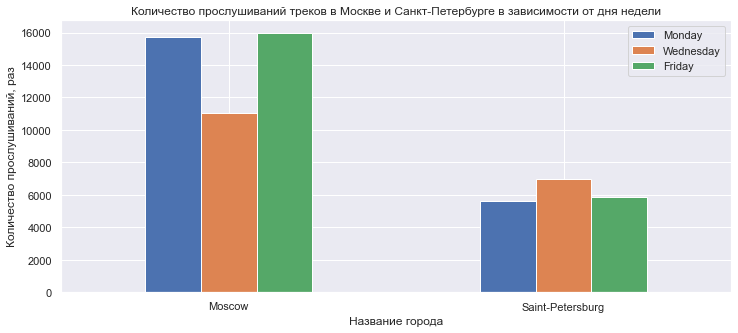

In [25]:
sns.set_theme(style="darkgrid")
(cities_df.set_index('city')
          .plot(kind='bar', figsize=(12,5), grid=True)
)
plt.title('Количество прослушиваний треков в Москве и Санкт-Петербурге в зависимости от дня недели')
plt.ylabel('Количество прослушиваний, раз')
plt.xlabel('Название города')
plt.xticks(rotation=360);

**Вывод**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Следовательно, данные говорят в пользу первой гипотезы.

### 3.2. Прослушивание музыки в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [26]:
# Таблица с результатами по Москве
moscow_general = df[df['city'] == 'Moscow']
moscow_general.head()

,user_id,track,artist,genre,city,time,day
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday


In [27]:
# Таблица с результатами по Санкт-Петербургу
spb_general = df[df['city'] == 'Saint-Petersburg']
spb_general.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
9,E772D5C0,Pessimist,unknown,dance,Saint-Petersburg,21:20:49,Wednesday


Создадим функцию `genre_weekday()`, которая должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

Объекты, которые хранят время, можно было реализовать через строки и сравнивать их как строки. В этом же варианте, столбец `time` был переведён в тип данных `datetime` и всё реализовалось через этот тип. 

In [28]:
# Функция для анализа количества прослушиваний по жанрам в определённый день и промежуток времени
def genre_weekday(table, day, time1, time2):
    genre_df = table[table['day'] == day]
    genre_df = genre_df[(genre_df['time'] > time1) & (genre_df['time'] < time2)]
    genre_df_count = genre_df.groupby('genre')['genre'].count().sort_values(ascending=False).head(10)
    return genre_df_count

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00)

In [29]:
# Функция для визуализации количества прослушиваний треков по жанрам в Москве и Санкт-Петербурге в пн утром и в пт вечером
def plotting_genres_time(genre_series, header):
    sns.set_theme(style="darkgrid")
    genre_series.plot(kind='barh', figsize=(12,5), grid=True)
    plt.title(header)
    plt.ylabel('Название жанра')
    plt.xlabel('Количество прослушиваний, раз')

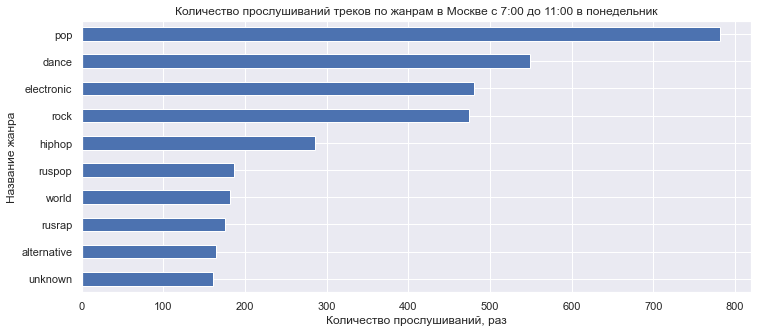

In [30]:
# Прослушивания в понедельник утром в Москве
plotting_genres_time(genre_weekday(moscow_general, 'Monday', dt.time(7), dt.time(11)).sort_values(ascending=True),
                     'Количество прослушиваний треков по жанрам в Москве с 7:00 до 11:00 в понедельник')

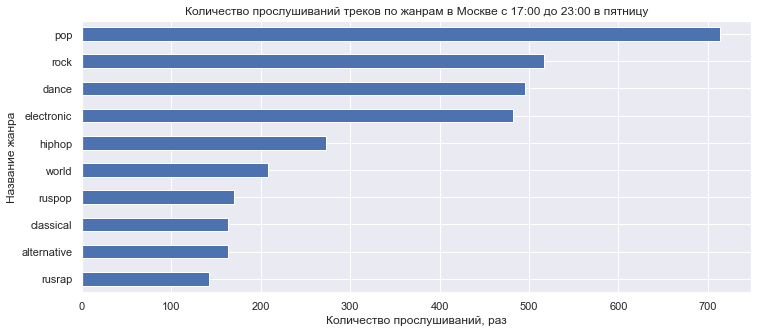

In [31]:
# Прослушивания в пятницу вечером в Москве
plotting_genres_time(genre_weekday(moscow_general, 'Friday', dt.time(17), dt.time(23)).sort_values(ascending=True),
                     'Количество прослушиваний треков по жанрам в Москве с 17:00 до 23:00 в пятницу')

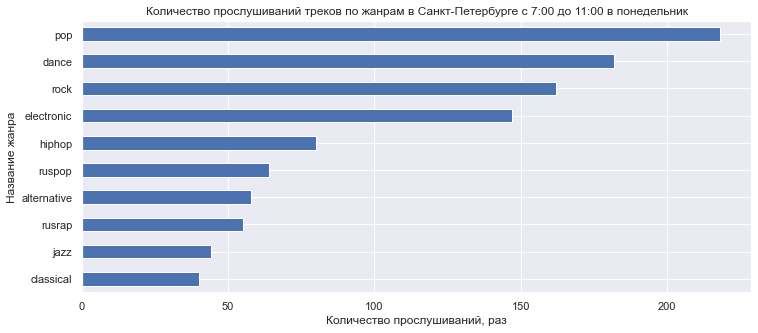

In [32]:
# Прослушивания в понедельник утром в Петербурге 
plotting_genres_time(genre_weekday(spb_general, 'Monday', dt.time(7), dt.time(11)).sort_values(ascending=True),
                     'Количество прослушиваний треков по жанрам в Санкт-Петербурге с 7:00 до 11:00 в понедельник')

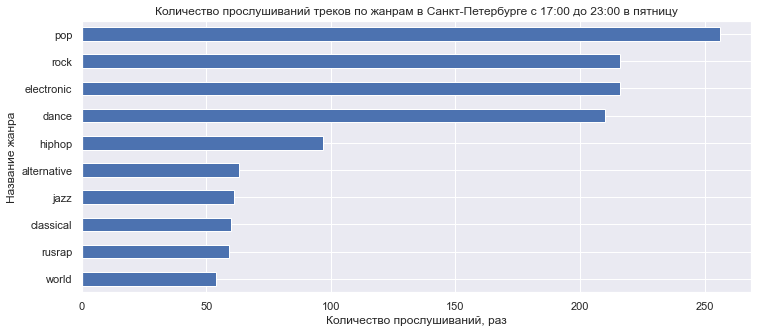

In [33]:
# Прослушивания в пятницу вечером в Петербурге 
plotting_genres_time(genre_weekday(spb_general, 'Friday', dt.time(17), dt.time(23)).sort_values(ascending=True),
                     'Количество прослушиваний треков по жанрам в Санкт-Петербурге с 17:00 до 23:00 в пятницу')

**Вывод**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### 3.3. Жанровые предпочтения в Москве и Петербурге

Рассматривая следующую гипотезу, Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве. А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра

In [34]:
moscow_genres = (moscow_general.groupby('genre')[['genre']].count()
                                                           .rename(columns={'genre':'cnt_listenings'})
                                                           .sort_values(by='cnt_listenings', ascending=False)
                                                           .head(10)
                )

In [35]:
# Функция для визуализации количества прослушиваний по каждому жанру
def plotting_barh(data, header):
    plt.figure(figsize=(12,5))
    sns.barplot(data=data, x=data.index, y=data['cnt_listenings'])
    plt.title(header)
    plt.xlabel('Название жанра')
    plt.ylabel('Количество прослушиваний, раз')
    plt.xticks(rotation=360)

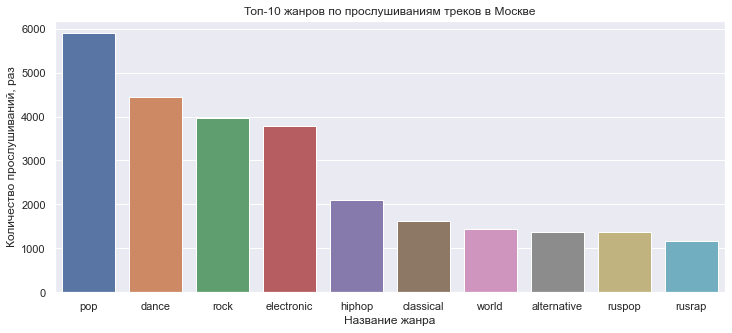

In [36]:
plotting_barh(moscow_genres, 'Топ-10 жанров по прослушиваниям треков в Москве')

Теперь повторим то же и для Петербурга

In [37]:
spb_genres = (spb_general.groupby('genre')[['genre']].count()
                                                     .rename(columns={'genre':'cnt_listenings'})
                                                     .sort_values(by='cnt_listenings', ascending=False)
                                                     .head(10)
             )

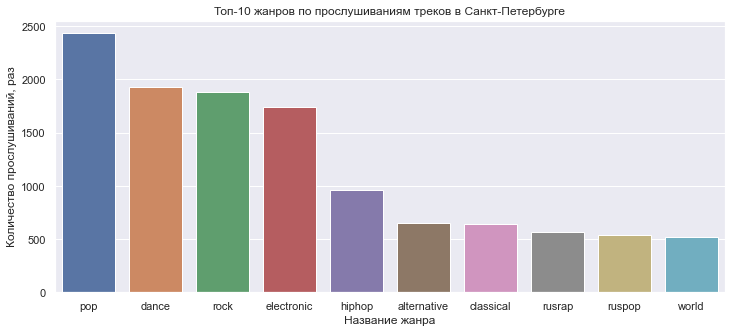

In [38]:
plotting_barh(spb_genres, 'Топ-10 жанров по прослушиваниям треков в Санкт-Петербурге')

**Вывод**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## 4. Итоги исследования

Были проверены три гипотезы, после чего установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* В Москве слушают музыку жанра "world"
* В Петербурге — джаз и классика.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.